# 機械学習スクラッチ ロジスティック回帰

参考サイト：<br>
決定領域のプロット方法<br>
https://enjoyworks.jp/tech-blog/3087<br>
ラムダのパラメータ設定基準<br>
https://jp.mathworks.com/help/stats/regularize-logistic-regression.html<br>
ラベルが0, 1以外で入った時の対処法
https://note.nkmk.me/python-pass-usage/<br>
https://python.atelierkobato.com/where/<br>

In [ ]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            else:
                y_hat[i] = 0
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題1】仮定関数

In [ ]:
# シグモイド関数、仮定関数の定義
def sigmoid(self, x):
    return 1 / (1 + np.exp(x))

def _linear_hypothis(self, X):
    return np.dot(X, self.theta)

【問題2】最急降下法

In [ ]:
def _gradient_descent(self, X, y):
    x = self._linearhypothis(X)
    pred = self.sigmoid(x)
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    self.theta[0] = met_sum[0] / X.shape[0]
    for j in range(1, X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])\
        + (self.lmd * self.theta[j] / X.shape[0])

【問題3】推定

上で実装済み

【問題4】目的関数

In [ ]:
def target_function(self, X, y, y_hat):
    return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m)\
            + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題5】学習と推定

In [111]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if list(set(np.unique(y)) - set([0, 1])) == []:
            self.base_label = None
            pass
        
        else:
            self.base_label = np.unique(y)
            np.place(y, y == self.base_label[0], 0)
            np.place(y, y == self.base_label[1], 1)
        
        print(y)
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
#         print(y_hat)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            elif y_hat[i] <= 0.5:
                y_hat[i] = 0
        
        if self.base_label.all() == None:
            pass
        else:
            y_hat = np.where(y_hat * 1 == 0, self.base_label[0], self.base_label[1])
        print(y_hat)
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

In [112]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
iris_data = iris.data[50:, :]
iris_target = iris.target[50:]

In [113]:
iris_data.shape

(100, 4)

In [114]:
iris_target.shape

(100,)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2)

In [116]:
SLR = ScratchLogisticRegression(bias=True, verbose=True)
SLR.fit(X_train, y_train)
pred = SLR.predict(X_test)
pred_proba = SLR.predict_proba(X_test)
print('予測ラベル: \n', pred)
print('予測確率: \n', pred_proba)

[0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 1]
1 / 10000 times done | loss value: 5.518367925043705
2 / 10000 times done | loss value: 5.51624261996187
3 / 10000 times done | loss value: 5.51411745749157
4 / 10000 times done | loss value: 5.511992437640765
5 / 10000 times done | loss value: 5.50986756041764
6 / 10000 times done | loss value: 5.507742825830331
7 / 10000 times done | loss value: 5.505618233887024
8 / 10000 times done | loss value: 5.503493784595861
9 / 10000 times done | loss value: 5.50136947796523
10 / 10000 times done | loss value: 5.499245314002916
11 / 10000 times done | loss value: 5.497121292717727
12 / 10000 times done | loss value: 5.494997414117761
13 / 10000 times done | loss value: 5.49287367821129
14 / 10000 times done | loss value: 5.4907500850064626
15 / 10000 times done | loss value: 5.488626634512011
16 / 10000 times done | loss value: 5.4

1056 / 10000 times done | loss value: 3.3604526207063983
1057 / 10000 times done | loss value: 3.3584989889945405
1058 / 10000 times done | loss value: 3.3565455795283063
1059 / 10000 times done | loss value: 3.354592392581667
1060 / 10000 times done | loss value: 3.3526394284295016
1061 / 10000 times done | loss value: 3.3506866873476024
1062 / 10000 times done | loss value: 3.3487341696126487
1063 / 10000 times done | loss value: 3.3467818755022427
1064 / 10000 times done | loss value: 3.3448298052948964
1065 / 10000 times done | loss value: 3.3428779592700306
1066 / 10000 times done | loss value: 3.340926337707993
1067 / 10000 times done | loss value: 3.338974940890053
1068 / 10000 times done | loss value: 3.337023769098389
1069 / 10000 times done | loss value: 3.3350728226161186
1070 / 10000 times done | loss value: 3.3331221017272887
1071 / 10000 times done | loss value: 3.331171606716877
1072 / 10000 times done | loss value: 3.3292213378707904
1073 / 10000 times done | loss value

1968 / 10000 times done | loss value: 1.7515223558580026
1969 / 10000 times done | loss value: 1.7501096559408473
1970 / 10000 times done | loss value: 1.748698258968278
1971 / 10000 times done | loss value: 1.7472881670523113
1972 / 10000 times done | loss value: 1.7458793823033405
1973 / 10000 times done | loss value: 1.744471906830102
1974 / 10000 times done | loss value: 1.7430657427396405
1975 / 10000 times done | loss value: 1.7416608921372756
1976 / 10000 times done | loss value: 1.7402573571265654
1977 / 10000 times done | loss value: 1.7388551398092753
1978 / 10000 times done | loss value: 1.7374542422853403
1979 / 10000 times done | loss value: 1.7360546666528347
1980 / 10000 times done | loss value: 1.734656415007932
1981 / 10000 times done | loss value: 1.7332594894448745
1982 / 10000 times done | loss value: 1.731863892055936
1983 / 10000 times done | loss value: 1.730469624931388
1984 / 10000 times done | loss value: 1.7290766901594656
1985 / 10000 times done | loss value

2550 / 10000 times done | loss value: 1.192372605357025
2551 / 10000 times done | loss value: 1.1918710677475783
2552 / 10000 times done | loss value: 1.1913708706629396
2553 / 10000 times done | loss value: 1.1908720118481244
2554 / 10000 times done | loss value: 1.190374489044797
2555 / 10000 times done | loss value: 1.1898782999913078
2556 / 10000 times done | loss value: 1.1893834424227363
2557 / 10000 times done | loss value: 1.1888899140709297
2558 / 10000 times done | loss value: 1.188397712664543
2559 / 10000 times done | loss value: 1.1879068359290819
2560 / 10000 times done | loss value: 1.1874172815869393
2561 / 10000 times done | loss value: 1.1869290473574383
2562 / 10000 times done | loss value: 1.1864421309568707
2563 / 10000 times done | loss value: 1.1859565300985393
2564 / 10000 times done | loss value: 1.1854722424927941
2565 / 10000 times done | loss value: 1.1849892658470755
2566 / 10000 times done | loss value: 1.1845075978659536
2567 / 10000 times done | loss val

2738 / 10000 times done | loss value: 1.119091549042142
2739 / 10000 times done | loss value: 1.1188006314355146
2740 / 10000 times done | loss value: 1.1185106113398602
2741 / 10000 times done | loss value: 1.1182214864815163
2742 / 10000 times done | loss value: 1.1179332545892844
2743 / 10000 times done | loss value: 1.117645913394449
2744 / 10000 times done | loss value: 1.1173594606307953
2745 / 10000 times done | loss value: 1.1170738940346288
2746 / 10000 times done | loss value: 1.1167892113447908
2747 / 10000 times done | loss value: 1.1165054103026777
2748 / 10000 times done | loss value: 1.1162224886522591
2749 / 10000 times done | loss value: 1.1159404441400946
2750 / 10000 times done | loss value: 1.115659274515351
2751 / 10000 times done | loss value: 1.1153789775298197
2752 / 10000 times done | loss value: 1.1150995509379344
2753 / 10000 times done | loss value: 1.1148209924967878
2754 / 10000 times done | loss value: 1.1145432999661473
2755 / 10000 times done | loss val

3054 / 10000 times done | loss value: 1.0612931036592417
3055 / 10000 times done | loss value: 1.0611898556628896
3056 / 10000 times done | loss value: 1.0610869570498438
3057 / 10000 times done | loss value: 1.0609844066618621
3058 / 10000 times done | loss value: 1.0608822033440268
3059 / 10000 times done | loss value: 1.060780345944738
3060 / 10000 times done | loss value: 1.0606788333157076
3061 / 10000 times done | loss value: 1.0605776643119533
3062 / 10000 times done | loss value: 1.0604768377917932
3063 / 10000 times done | loss value: 1.060376352616839
3064 / 10000 times done | loss value: 1.0602762076519912
3065 / 10000 times done | loss value: 1.0601764017654318
3066 / 10000 times done | loss value: 1.060076933828618
3067 / 10000 times done | loss value: 1.0599778027162783
3068 / 10000 times done | loss value: 1.0598790073064046
3069 / 10000 times done | loss value: 1.0597805464802459
3070 / 10000 times done | loss value: 1.0596824191223038
3071 / 10000 times done | loss val

3554 / 10000 times done | loss value: 1.0362243844123589
3555 / 10000 times done | loss value: 1.0362042301050305
3556 / 10000 times done | loss value: 1.0361841351465388
3557 / 10000 times done | loss value: 1.0361640993196946
3558 / 10000 times done | loss value: 1.0361441224080936
3559 / 10000 times done | loss value: 1.036124204196112
3560 / 10000 times done | loss value: 1.0361043444689053
3561 / 10000 times done | loss value: 1.0360845430124042
3562 / 10000 times done | loss value: 1.0360647996133119
3563 / 10000 times done | loss value: 1.036045114059104
3564 / 10000 times done | loss value: 1.0360254861380223
3565 / 10000 times done | loss value: 1.036005915639074
3566 / 10000 times done | loss value: 1.0359864023520289
3567 / 10000 times done | loss value: 1.0359669460674172
3568 / 10000 times done | loss value: 1.035947546576525
3569 / 10000 times done | loss value: 1.0359282036713946
3570 / 10000 times done | loss value: 1.0359089171448186
3571 / 10000 times done | loss valu

4120 / 10000 times done | loss value: 1.0301154744279222
4121 / 10000 times done | loss value: 1.0301094864061495
4122 / 10000 times done | loss value: 1.0301035058843853
4123 / 10000 times done | loss value: 1.0300975328358832
4124 / 10000 times done | loss value: 1.0300915672339968
4125 / 10000 times done | loss value: 1.030085609052179
4126 / 10000 times done | loss value: 1.0300796582639826
4127 / 10000 times done | loss value: 1.030073714843058
4128 / 10000 times done | loss value: 1.0300677787631551
4129 / 10000 times done | loss value: 1.030061849998121
4130 / 10000 times done | loss value: 1.030055928521901
4131 / 10000 times done | loss value: 1.0300500143085372
4132 / 10000 times done | loss value: 1.0300441073321691
4133 / 10000 times done | loss value: 1.0300382075670327
4134 / 10000 times done | loss value: 1.0300323149874595
4135 / 10000 times done | loss value: 1.0300264295678778
4136 / 10000 times done | loss value: 1.0300205512828111
4137 / 10000 times done | loss valu

4860 / 10000 times done | loss value: 1.0267146998044923
4861 / 10000 times done | loss value: 1.0267107594987648
4862 / 10000 times done | loss value: 1.0267068199787122
4863 / 10000 times done | loss value: 1.0267028812426426
4864 / 10000 times done | loss value: 1.0266989432888707
4865 / 10000 times done | loss value: 1.026695006115717
4866 / 10000 times done | loss value: 1.0266910697215086
4867 / 10000 times done | loss value: 1.0266871341045785
4868 / 10000 times done | loss value: 1.0266831992632657
4869 / 10000 times done | loss value: 1.0266792651959158
4870 / 10000 times done | loss value: 1.0266753319008801
4871 / 10000 times done | loss value: 1.0266713993765164
4872 / 10000 times done | loss value: 1.026667467621188
4873 / 10000 times done | loss value: 1.0266635366332646
4874 / 10000 times done | loss value: 1.0266596064111218
4875 / 10000 times done | loss value: 1.0266556769531412
4876 / 10000 times done | loss value: 1.0266517482577104
4877 / 10000 times done | loss va

5419 / 10000 times done | loss value: 1.0246030787014284
5420 / 10000 times done | loss value: 1.0245994293020446
5421 / 10000 times done | loss value: 1.0245957802850478
5422 / 10000 times done | loss value: 1.0245921316502145
5423 / 10000 times done | loss value: 1.0245884833973216
5424 / 10000 times done | loss value: 1.024584835526146
5425 / 10000 times done | loss value: 1.0245811880364664
5426 / 10000 times done | loss value: 1.0245775409280622
5427 / 10000 times done | loss value: 1.024573894200713
5428 / 10000 times done | loss value: 1.0245702478541996
5429 / 10000 times done | loss value: 1.024566601888303
5430 / 10000 times done | loss value: 1.024562956302806
5431 / 10000 times done | loss value: 1.0245593110974913
5432 / 10000 times done | loss value: 1.0245556662721425
5433 / 10000 times done | loss value: 1.0245520218265443
5434 / 10000 times done | loss value: 1.0245483777604816
5435 / 10000 times done | loss value: 1.0245447340737408
5436 / 10000 times done | loss valu

5602 / 10000 times done | loss value: 1.0239414126658721
5603 / 10000 times done | loss value: 1.0239378301853126
5604 / 10000 times done | loss value: 1.0239342480567235
5605 / 10000 times done | loss value: 1.0239306662799852
5606 / 10000 times done | loss value: 1.023927084854979
5607 / 10000 times done | loss value: 1.0239235037815866
5608 / 10000 times done | loss value: 1.023919923059689
5609 / 10000 times done | loss value: 1.0239163426891686
5610 / 10000 times done | loss value: 1.023912762669908
5611 / 10000 times done | loss value: 1.0239091830017903
5612 / 10000 times done | loss value: 1.023905603684699
5613 / 10000 times done | loss value: 1.023902024718517
5614 / 10000 times done | loss value: 1.0238984461031295
5615 / 10000 times done | loss value: 1.0238948678384205
5616 / 10000 times done | loss value: 1.023891289924275
5617 / 10000 times done | loss value: 1.0238877123605779
5618 / 10000 times done | loss value: 1.0238841351472152
5619 / 10000 times done | loss value:

5784 / 10000 times done | loss value: 1.0232950961578098
5785 / 10000 times done | loss value: 1.0232915761084367
5786 / 10000 times done | loss value: 1.023288056394677
5787 / 10000 times done | loss value: 1.023284537016465
5788 / 10000 times done | loss value: 1.0232810179737348
5789 / 10000 times done | loss value: 1.0232774992664213
5790 / 10000 times done | loss value: 1.023273980894459
5791 / 10000 times done | loss value: 1.023270462857783
5792 / 10000 times done | loss value: 1.0232669451563285
5793 / 10000 times done | loss value: 1.023263427790031
5794 / 10000 times done | loss value: 1.0232599107588258
5795 / 10000 times done | loss value: 1.0232563940626491
5796 / 10000 times done | loss value: 1.0232528777014365
5797 / 10000 times done | loss value: 1.0232493616751244
5798 / 10000 times done | loss value: 1.0232458459836495
5799 / 10000 times done | loss value: 1.0232423306269482
5800 / 10000 times done | loss value: 1.023238815604957
5801 / 10000 times done | loss value:

6014 / 10000 times done | loss value: 1.0224942117221938
6015 / 10000 times done | loss value: 1.0224907674748334
6016 / 10000 times done | loss value: 1.0224873235522067
6017 / 10000 times done | loss value: 1.0224838799542804
6018 / 10000 times done | loss value: 1.0224804366810214
6019 / 10000 times done | loss value: 1.0224769937323972
6020 / 10000 times done | loss value: 1.0224735511083751
6021 / 10000 times done | loss value: 1.022470108808922
6022 / 10000 times done | loss value: 1.0224666668340059
6023 / 10000 times done | loss value: 1.022463225183594
6024 / 10000 times done | loss value: 1.022459783857654
6025 / 10000 times done | loss value: 1.0224563428561535
6026 / 10000 times done | loss value: 1.0224529021790605
6027 / 10000 times done | loss value: 1.0224494618263429
6028 / 10000 times done | loss value: 1.0224460217979687
6029 / 10000 times done | loss value: 1.0224425820939058
6030 / 10000 times done | loss value: 1.0224391427141224
6031 / 10000 times done | loss val

6389 / 10000 times done | loss value: 1.0212251624173379
6390 / 10000 times done | loss value: 1.021221838233664
6391 / 10000 times done | loss value: 1.0212185143667716
6392 / 10000 times done | loss value: 1.0212151908166476
6393 / 10000 times done | loss value: 1.0212118675832782
6394 / 10000 times done | loss value: 1.0212085446666503
6395 / 10000 times done | loss value: 1.0212052220667507
6396 / 10000 times done | loss value: 1.021201899783566
6397 / 10000 times done | loss value: 1.0211985778170831
6398 / 10000 times done | loss value: 1.0211952561672888
6399 / 10000 times done | loss value: 1.0211919348341696
6400 / 10000 times done | loss value: 1.0211886138177126
6401 / 10000 times done | loss value: 1.0211852931179046
6402 / 10000 times done | loss value: 1.0211819727347327
6403 / 10000 times done | loss value: 1.0211786526681834
6404 / 10000 times done | loss value: 1.0211753329182438
6405 / 10000 times done | loss value: 1.021172013484901
6406 / 10000 times done | loss val

6711 / 10000 times done | loss value: 1.0201710827004886
6712 / 10000 times done | loss value: 1.0201678599438613
6713 / 10000 times done | loss value: 1.0201646375007045
6714 / 10000 times done | loss value: 1.0201614153710108
6715 / 10000 times done | loss value: 1.0201581935547723
6716 / 10000 times done | loss value: 1.0201549720519805
6717 / 10000 times done | loss value: 1.0201517508626274
6718 / 10000 times done | loss value: 1.0201485299867055
6719 / 10000 times done | loss value: 1.0201453094242061
6720 / 10000 times done | loss value: 1.0201420891751218
6721 / 10000 times done | loss value: 1.0201388692394444
6722 / 10000 times done | loss value: 1.0201356496171656
6723 / 10000 times done | loss value: 1.0201324303082782
6724 / 10000 times done | loss value: 1.0201292113127733
6725 / 10000 times done | loss value: 1.020125992630644
6726 / 10000 times done | loss value: 1.0201227742618817
6727 / 10000 times done | loss value: 1.0201195562064784
6728 / 10000 times done | loss v

6988 / 10000 times done | loss value: 1.0192903356593455
6989 / 10000 times done | loss value: 1.0192871994547192
6990 / 10000 times done | loss value: 1.0192840635616238
6991 / 10000 times done | loss value: 1.0192809279800528
6992 / 10000 times done | loss value: 1.0192777927100007
6993 / 10000 times done | loss value: 1.0192746577514606
6994 / 10000 times done | loss value: 1.019271523104427
6995 / 10000 times done | loss value: 1.0192683887688931
6996 / 10000 times done | loss value: 1.019265254744853
6997 / 10000 times done | loss value: 1.0192621210323007
6998 / 10000 times done | loss value: 1.01925898763123
6999 / 10000 times done | loss value: 1.0192558545416341
7000 / 10000 times done | loss value: 1.019252721763508
7001 / 10000 times done | loss value: 1.0192495892968443
7002 / 10000 times done | loss value: 1.0192464571416378
7003 / 10000 times done | loss value: 1.019243325297882
7004 / 10000 times done | loss value: 1.0192401937655706
7005 / 10000 times done | loss value:

7251 / 10000 times done | loss value: 1.0184762292070793
7252 / 10000 times done | loss value: 1.0184731747329476
7253 / 10000 times done | loss value: 1.018470120568841
7254 / 10000 times done | loss value: 1.0184670667147535
7255 / 10000 times done | loss value: 1.0184640131706801
7256 / 10000 times done | loss value: 1.0184609599366155
7257 / 10000 times done | loss value: 1.0184579070125541
7258 / 10000 times done | loss value: 1.0184548543984908
7259 / 10000 times done | loss value: 1.0184518020944202
7260 / 10000 times done | loss value: 1.018448750100337
7261 / 10000 times done | loss value: 1.0184456984162356
7262 / 10000 times done | loss value: 1.0184426470421108
7263 / 10000 times done | loss value: 1.0184395959779575
7264 / 10000 times done | loss value: 1.0184365452237703
7265 / 10000 times done | loss value: 1.0184334947795437
7266 / 10000 times done | loss value: 1.018430444645272
7267 / 10000 times done | loss value: 1.018427394820951
7268 / 10000 times done | loss valu

7499 / 10000 times done | loss value: 1.0177282019306813
7500 / 10000 times done | loss value: 1.017725224183709
7501 / 10000 times done | loss value: 1.017722246745492
7502 / 10000 times done | loss value: 1.0177192696160247
7503 / 10000 times done | loss value: 1.0177162927953025
7504 / 10000 times done | loss value: 1.0177133162833205
7505 / 10000 times done | loss value: 1.0177103400800735
7506 / 10000 times done | loss value: 1.0177073641855572
7507 / 10000 times done | loss value: 1.0177043885997659
7508 / 10000 times done | loss value: 1.0177014133226954
7509 / 10000 times done | loss value: 1.0176984383543402
7510 / 10000 times done | loss value: 1.0176954636946953
7511 / 10000 times done | loss value: 1.0176924893437564
7512 / 10000 times done | loss value: 1.0176895153015184
7513 / 10000 times done | loss value: 1.017686541567976
7514 / 10000 times done | loss value: 1.0176835681431249
7515 / 10000 times done | loss value: 1.0176805950269596
7516 / 10000 times done | loss val

7858 / 10000 times done | loss value: 1.0166789947184576
7859 / 10000 times done | loss value: 1.0166761275058094
7860 / 10000 times done | loss value: 1.01667326060021
7861 / 10000 times done | loss value: 1.0166703940016553
7862 / 10000 times done | loss value: 1.0166675277101405
7863 / 10000 times done | loss value: 1.016664661725661
7864 / 10000 times done | loss value: 1.0166617960482123
7865 / 10000 times done | loss value: 1.0166589306777893
7866 / 10000 times done | loss value: 1.016656065614388
7867 / 10000 times done | loss value: 1.0166532008580036
7868 / 10000 times done | loss value: 1.0166503364086312
7869 / 10000 times done | loss value: 1.0166474722662666
7870 / 10000 times done | loss value: 1.016644608430905
7871 / 10000 times done | loss value: 1.016641744902542
7872 / 10000 times done | loss value: 1.0166388816811727
7873 / 10000 times done | loss value: 1.0166360187667922
7874 / 10000 times done | loss value: 1.0166331561593969
7875 / 10000 times done | loss value:

8167 / 10000 times done | loss value: 1.0158076149835522
8168 / 10000 times done | loss value: 1.0158048424320791
8169 / 10000 times done | loss value: 1.0158020701862531
8170 / 10000 times done | loss value: 1.01579929824607
8171 / 10000 times done | loss value: 1.015796526611525
8172 / 10000 times done | loss value: 1.0157937552826135
8173 / 10000 times done | loss value: 1.0157909842593313
8174 / 10000 times done | loss value: 1.015788213541674
8175 / 10000 times done | loss value: 1.0157854431296371
8176 / 10000 times done | loss value: 1.0157826730232158
8177 / 10000 times done | loss value: 1.015779903222406
8178 / 10000 times done | loss value: 1.015777133727203
8179 / 10000 times done | loss value: 1.0157743645376025
8180 / 10000 times done | loss value: 1.0157715956535998
8181 / 10000 times done | loss value: 1.0157688270751908
8182 / 10000 times done | loss value: 1.0157660588023707
8183 / 10000 times done | loss value: 1.0157632908351348
8184 / 10000 times done | loss value:

8581 / 10000 times done | loss value: 1.0146858565768986
8582 / 10000 times done | loss value: 1.014683210184175
8583 / 10000 times done | loss value: 1.014680564095269
8584 / 10000 times done | loss value: 1.0146779183101764
8585 / 10000 times done | loss value: 1.0146752728288928
8586 / 10000 times done | loss value: 1.0146726276514144
8587 / 10000 times done | loss value: 1.0146699827777361
8588 / 10000 times done | loss value: 1.014667338207854
8589 / 10000 times done | loss value: 1.0146646939417634
8590 / 10000 times done | loss value: 1.01466204997946
8591 / 10000 times done | loss value: 1.01465940632094
8592 / 10000 times done | loss value: 1.0146567629661978
8593 / 10000 times done | loss value: 1.0146541199152301
8594 / 10000 times done | loss value: 1.0146514771680322
8595 / 10000 times done | loss value: 1.0146488347245999
8596 / 10000 times done | loss value: 1.014646192584928
8597 / 10000 times done | loss value: 1.0146435507490132
8598 / 10000 times done | loss value: 1

9129 / 10000 times done | loss value: 1.013281050239708
9130 / 10000 times done | loss value: 1.0132785696876692
9131 / 10000 times done | loss value: 1.0132760894370727
9132 / 10000 times done | loss value: 1.0132736094879138
9133 / 10000 times done | loss value: 1.013271129840188
9134 / 10000 times done | loss value: 1.0132686504938913
9135 / 10000 times done | loss value: 1.0132661714490194
9136 / 10000 times done | loss value: 1.013263692705568
9137 / 10000 times done | loss value: 1.0132612142635329
9138 / 10000 times done | loss value: 1.0132587361229093
9139 / 10000 times done | loss value: 1.0132562582836937
9140 / 10000 times done | loss value: 1.013253780745881
9141 / 10000 times done | loss value: 1.0132513035094677
9142 / 10000 times done | loss value: 1.0132488265744484
9143 / 10000 times done | loss value: 1.0132463499408197
9144 / 10000 times done | loss value: 1.0132438736085772
9145 / 10000 times done | loss value: 1.0132413975777164
9146 / 10000 times done | loss valu

9425 / 10000 times done | loss value: 1.0125599494023207
9426 / 10000 times done | loss value: 1.0125575578895363
9427 / 10000 times done | loss value: 1.0125551666769237
9428 / 10000 times done | loss value: 1.0125527757644779
9429 / 10000 times done | loss value: 1.0125503851521955
9430 / 10000 times done | loss value: 1.0125479948400715
9431 / 10000 times done | loss value: 1.0125456048281019
9432 / 10000 times done | loss value: 1.0125432151162825
9433 / 10000 times done | loss value: 1.0125408257046087
9434 / 10000 times done | loss value: 1.0125384365930767
9435 / 10000 times done | loss value: 1.0125360477816816
9436 / 10000 times done | loss value: 1.01253365927042
9437 / 10000 times done | loss value: 1.0125312710592866
9438 / 10000 times done | loss value: 1.012528883148278
9439 / 10000 times done | loss value: 1.0125264955373892
9440 / 10000 times done | loss value: 1.0125241082266163
9441 / 10000 times done | loss value: 1.0125217212159552
9442 / 10000 times done | loss val

9705 / 10000 times done | loss value: 1.0119020350457066
9706 / 10000 times done | loss value: 1.0118997274140005
9707 / 10000 times done | loss value: 1.01189742008127
9708 / 10000 times done | loss value: 1.0118951130475107
9709 / 10000 times done | loss value: 1.011892806312719
9710 / 10000 times done | loss value: 1.0118904998768898
9711 / 10000 times done | loss value: 1.0118881937400195
9712 / 10000 times done | loss value: 1.0118858879021033
9713 / 10000 times done | loss value: 1.0118835823631374
9714 / 10000 times done | loss value: 1.0118812771231172
9715 / 10000 times done | loss value: 1.0118789721820387
9716 / 10000 times done | loss value: 1.0118766675398976
9717 / 10000 times done | loss value: 1.0118743631966893
9718 / 10000 times done | loss value: 1.0118720591524102
9719 / 10000 times done | loss value: 1.0118697554070553
9720 / 10000 times done | loss value: 1.0118674519606208
9721 / 10000 times done | loss value: 1.011865148813102
9722 / 10000 times done | loss valu

In [117]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 85.0%
適合率: 85.71428571428571%
再現率: 75.0%
F値: 0.7999999999999999


【問題6】学習曲線のプロット

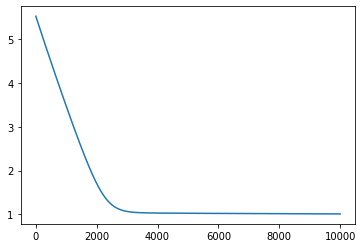

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(10000), SLR.loss_list)
plt.show()

In [119]:
SLR.theta

array([ 0.82977166, -0.30949994,  0.00995669,  0.23072657,  0.01314262])

【問題7】決定領域の可視化

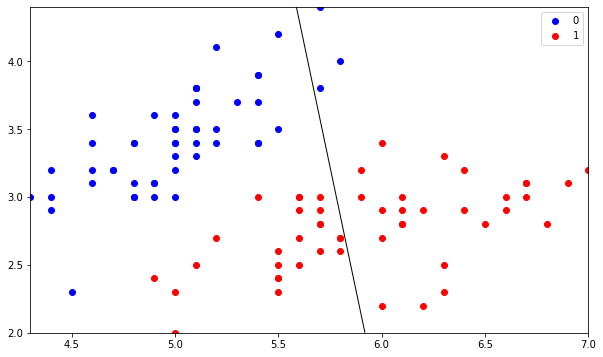

In [482]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data[iris_target == 0][:, 0], iris_data[iris_target == 0][:, 1], color='b', label='0')
plt.scatter(iris_data[iris_target == 1][:, 0], iris_data[iris_target == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = iris_data[:,0].min(), iris_data[:,0].max(),
x2_min, x2_max = iris_data[:,1].min(), iris_data[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = SLR.predict_proba(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

【問題8】（アドバンス課題）重みの保存

In [15]:
import pickle

# テキストモードで保存
with open('weight.pickle', 'wb') as f:
    pickle.dump(SLR.theta, f)

In [16]:
# ファイル読み込み
with open('weight.pickle', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]


In [17]:
# np.saveで保存
np.save('np_save', SLR.theta)

In [18]:
# np.loadで読み込み
print(np.load('np_save.npy'))
print(type(np.load('np_save.npy')))

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]
<class 'numpy.ndarray'>
